In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings(action = 'ignore')
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [3]:
df = pd.read_csv("Cleaned_data.csv")

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7032, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [7]:
obj_cols = []
num_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        obj_cols.append(col)
    else:
        num_cols.append(col)
obj_cols.remove('Churn')

In [8]:
from sklearn.metrics import mutual_info_score

def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


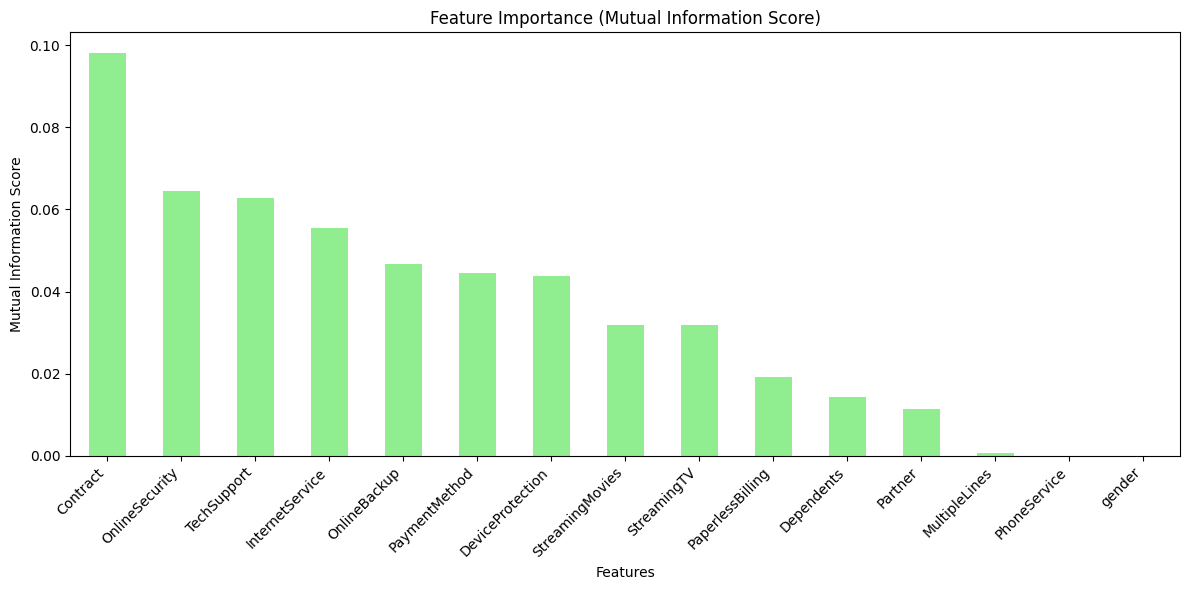

In [9]:
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar', color='lightgreen')
plt.title('Feature Importance (Mutual Information Score)')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## encoding categorical variables

In [10]:
print(obj_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [11]:
churn_labels = {'No': 0, 'Yes': 1}

df['Churn'] = df['Churn'].map(churn_labels)

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [13]:
two_cat_val = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
mul_cat_val = ['MultipleLines', 'InternetService', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [14]:
gender_labels = {'Female': 0, 'Male': 1}

df['gender'] = df['gender'].map(gender_labels)

In [15]:
for col in two_cat_val:
    col_labels = {'No': 0, 'Yes': 1}
    df[col] = df[col].map(col_labels)

In [16]:
for col in mul_cat_val:
    one_hot_encoded = pd.get_dummies(df[col], prefix=col)    
    df = pd.concat([df, one_hot_encoded], axis=1)
    df.drop(col, axis=1, inplace=True)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [18]:
# min-max normalization
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in min_max_columns:
        min_column = df[column].min()
        max_column = df[column].max()
        
        df[column] = (df[column] - min_column) / (max_column - min_column)   

## splitting data

In [19]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [20]:
print(X.shape, y.shape)

(7032, 40) (7032,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [22]:
def create_models(seed=42):

    models = []
    models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=seed)))
    models.append(('Logistic Regression', LogisticRegression(random_state=seed)))
    models.append(('Support Vector Machines', SVC(random_state=seed)))
    models.append(('Random Forest', RandomForestClassifier(random_state=seed)))
    models.append(('k nearest neighbors', KNeighborsClassifier(n_neighbors=10)))
    return models

models = create_models()

In [23]:
results = []
names = []
start = "\033[1m"
end = "\033[0;0m"
scoring = 'accuracy'
for name, model in models:
    
    model.fit(X_train, y_train).predict(X_test)
    predictions = model.predict(X_test) 
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    results.append(accuracy)
    names.append(name)
    print(start + name + end)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("Classification Report:")    
    print(classification_report(y_test, predictions))

Gradient Boosting
Accuracy: 80.45%
Precision: 0.66
Recall: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.66      0.52      0.58       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.80      1407

Logistic Regression
Accuracy: 80.31%
Precision: 0.65
Recall: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.65      0.53      0.59       369

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407

Support Vector Machines
Accuracy: 80.24%
Precision: 0.67
Recall: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.8